In [ ]:
import numpy as np; np.set_printoptions(precision=2)
import pandas as pd; pd.options.display.float_format = "{:,.2f}".format
from PIL import Image
import numpy as np
from matplotlib import pylab as plt
import matplotlib.cm as cm
from sklearn.linear_model import LogisticRegression

Load Data

In [ ]:
def read_paths(dataset):
    if dataset not in ['train', 'test']:
        raise ValueError('Choose a valid value of dataset (train or test)')

    with open(f'../data/{dataset}.txt', 'r') as f:
        lines = f.readlines()

    image_paths = []
    labels = []
    for line in lines:
        path, label = line.strip().split()
        image_paths.append(path)
        labels.append(int(label))

    images = []
    for path in image_paths:
        img = Image.open(path)
        img_array = np.array(img).reshape(2500,)
        images.append(img_array)

    mtx_images = np.array(images)
    mtx_labels = np.array(labels)

    return mtx_images, mtx_labels

In [ ]:
X_train, y_train = read_paths('train')
X_test, y_test = read_paths('test')

(540, 2500) (540,)


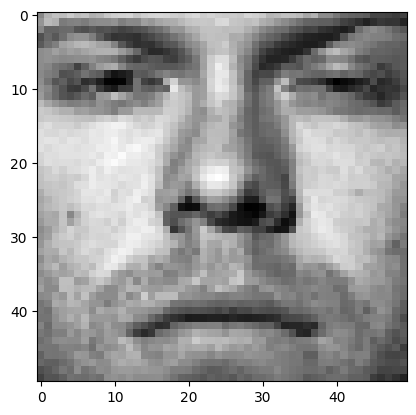

In [ ]:
print(X_train.shape, y_train.shape)
plt.imshow(X_train[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

Average Face

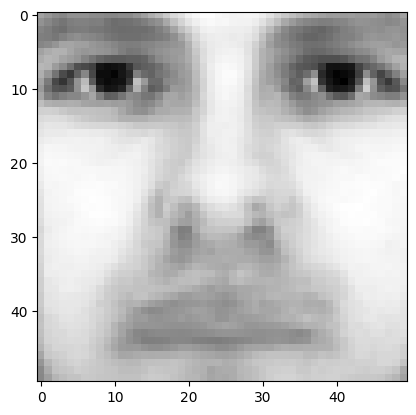

In [ ]:
avg_vec_train = np.mean(X_train, axis=0)
plt.imshow(avg_vec_train.reshape(50,50), cmap = cm.Greys_r)
plt.show()

Mean Subtraction

In [ ]:
def mead_subtraction(avg_vec, X):
    avg_mtx = np.array([avg_vec for x in range(X.shape[0])])
    demeaned = X - avg_mtx
    return demeaned

In [ ]:
avg_vec_test = np.mean(X_test, axis=0)

In [ ]:
X_train_demeaned = mead_subtraction(avg_vec_train, X_train)
X_test_demeaned = mead_subtraction(avg_vec_test, X_test)

Eigenfaces

In [ ]:
def eig_faces(X):
    Sigma = X.T.dot(X) / X.shape[0]
    L, Q = np.linalg.eig(Sigma)
    Q_r = np.real(Q).T
    L_r = np.real(L)
    return L_r, Q_r

In [ ]:
L_train, Q_r_train = eig_faces(X_train_demeaned)

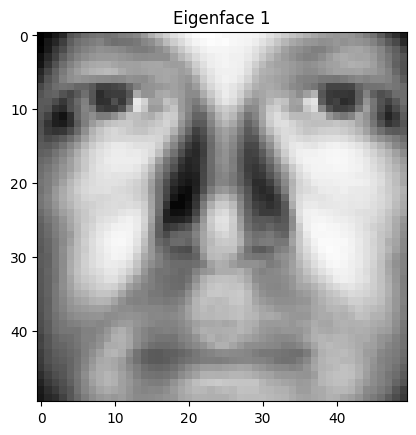

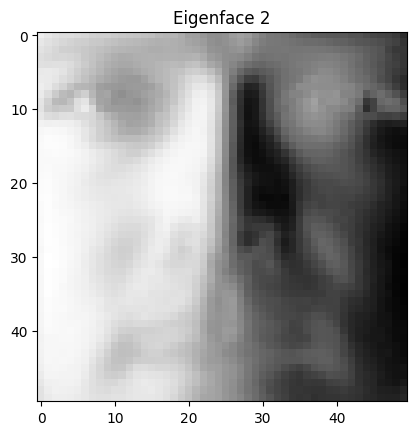

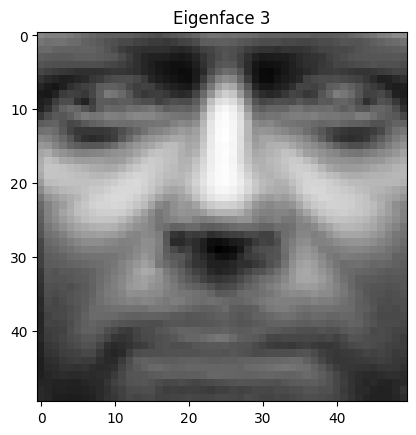

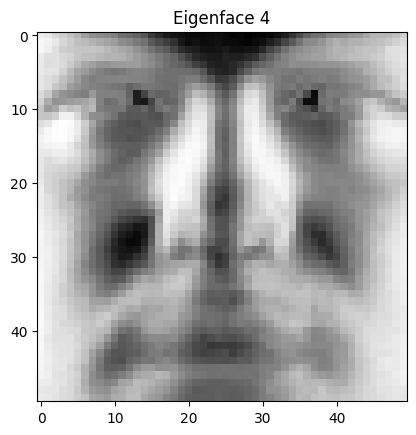

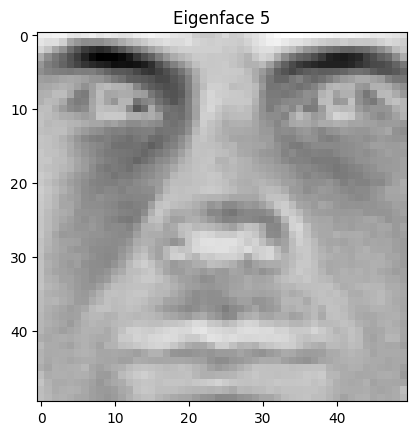

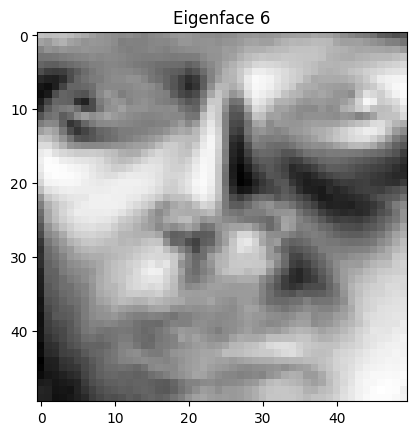

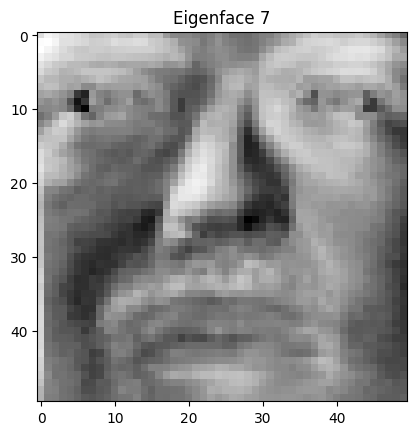

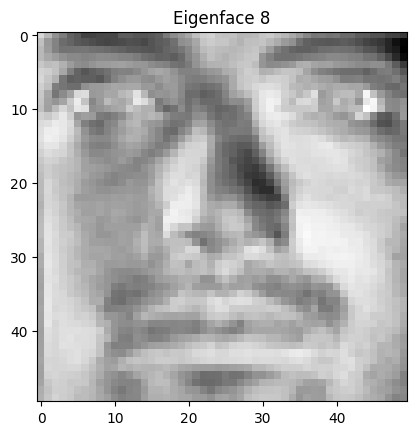

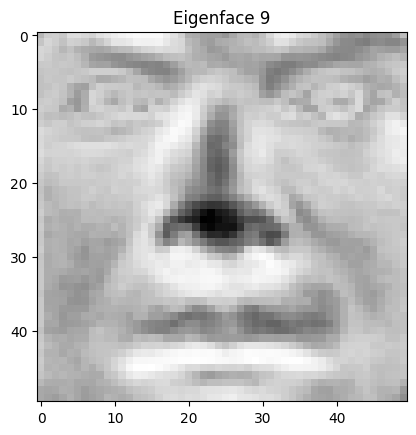

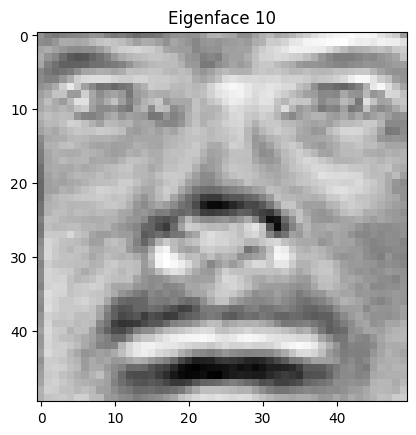

In [ ]:
for x in range(10):
    plt.imshow(Q_r_train[x, :].reshape(50,50), cmap = cm.Greys_r)
    plt.title(f'Eigenface {x+1}')
    plt.show()

Eigenface Features

In [ ]:
def eigen_feature(X, Q, p):
    F = X @ Q[:,:p]
    return F

Face Recognition

In [ ]:
EF_train = eigen_feature(X_train_demeaned, Q_r_train.T, 10)
EF_test = eigen_feature(X_test_demeaned, Q_r_train.T, 10)
logreg = LogisticRegression(fit_intercept=False, max_iter=5000)
logreg.fit(EF_train, y_train)
print('Accuracy on ten PCA dimensions: %.2f' % logreg.score(EF_test, y_test))

Accuracy on ten PCA dimensions: 0.76


In [ ]:
lst_accuracy = []
for i in range(1,201):
    EF_train = eigen_feature(X_train_demeaned, Q_r_train.T, i)
    EF_test = eigen_feature(X_test_demeaned, Q_r_train.T, i)
    logreg = LogisticRegression(fit_intercept=False, max_iter=5000)
    logreg.fit(EF_train, y_train)
    accuracy = logreg.score(EF_test, y_test)
    print(f'Accuracy on {i} PCA dimensions: %.2f' % accuracy)
    lst_accuracy.append(accuracy)

Accuracy on 1 PCA dimensions: 0.14
Accuracy on 2 PCA dimensions: 0.13
Accuracy on 3 PCA dimensions: 0.15
Accuracy on 4 PCA dimensions: 0.19
Accuracy on 5 PCA dimensions: 0.34
Accuracy on 6 PCA dimensions: 0.30
Accuracy on 7 PCA dimensions: 0.47
Accuracy on 8 PCA dimensions: 0.68
Accuracy on 9 PCA dimensions: 0.73
Accuracy on 10 PCA dimensions: 0.76
Accuracy on 11 PCA dimensions: 0.77
Accuracy on 12 PCA dimensions: 0.77
Accuracy on 13 PCA dimensions: 0.78
Accuracy on 14 PCA dimensions: 0.82
Accuracy on 15 PCA dimensions: 0.85
Accuracy on 16 PCA dimensions: 0.88
Accuracy on 17 PCA dimensions: 0.84
Accuracy on 18 PCA dimensions: 0.84
Accuracy on 19 PCA dimensions: 0.88
Accuracy on 20 PCA dimensions: 0.86
Accuracy on 21 PCA dimensions: 0.83
Accuracy on 22 PCA dimensions: 0.83
Accuracy on 23 PCA dimensions: 0.85
Accuracy on 24 PCA dimensions: 0.85
Accuracy on 25 PCA dimensions: 0.87
Accuracy on 26 PCA dimensions: 0.89
Accuracy on 27 PCA dimensions: 0.84
Accuracy on 28 PCA dimensions: 0.84
A

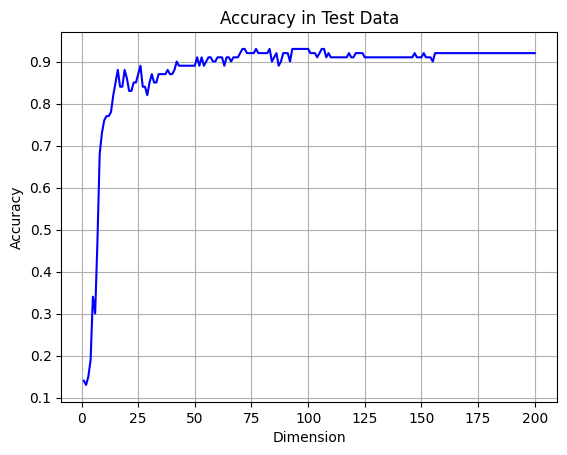

In [ ]:
plt.plot(range(1,201), lst_accuracy, linestyle='-', color='blue')
plt.title('Accuracy in Test Data')
plt.xlabel('Dimension')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Low-Rank Reconstruction Loss

In [ ]:
Q_r_train[:200, :]

array([[ 8.56e-05,  1.03e-03,  3.09e-03, ...,  1.05e-02,  8.32e-03,
         6.59e-03],
       [ 2.59e-02,  2.33e-02,  2.11e-02, ..., -2.44e-02, -2.45e-02,
        -2.33e-02],
       [ 7.77e-03,  5.36e-03,  5.00e-03, ..., -2.74e-02, -2.60e-02,
        -2.39e-02],
       ...,
       [-1.41e-02,  4.02e-03,  6.33e-03, ..., -1.14e-02, -5.54e-03,
        -1.55e-02],
       [-1.35e-02, -3.37e-02, -2.48e-02, ..., -9.99e-03, -2.69e-02,
         4.74e-03],
       [ 8.28e-03,  5.13e-03,  4.62e-02, ...,  2.46e-02, -1.87e-03,
        -2.43e-02]], shape=(200, 2500))

In [ ]:
lst_fro = []
for i in range(1,201):
    EF_train = eigen_feature(X_train_demeaned, Q_r_train.T, i)
    X_rec = EF_train @ Q_r_train[:i, :]
    dist = np.linalg.norm(X_train_demeaned - X_rec, 'fro')
    lst_fro.append(dist)

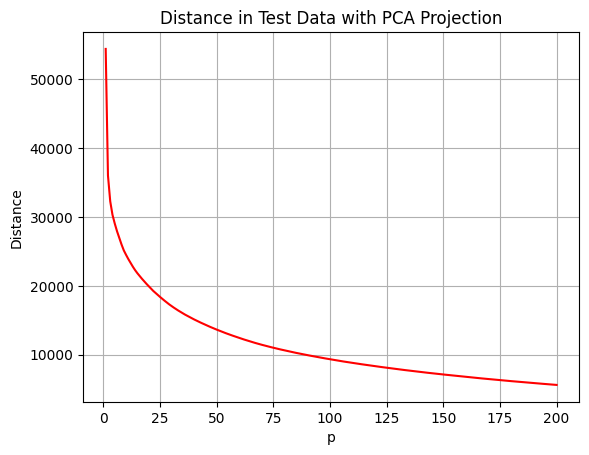

In [ ]:
plt.plot(range(1,201), lst_fro, linestyle='-', color='red')
plt.title('Distance in Test Data with PCA Projection')
plt.xlabel('p')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [13]:
batch_size = 128
num_epochs = 8
num_classes = 10
learning_rate = 0.002
seed = 42

mnist_train = datasets.MNIST(
    "/content/sample_data", download=True, train=True,
    transform=transforms.ToTensor()
)
mnist_test = datasets.MNIST(
    "/content/sample_data", train=False, transform=transforms.ToTensor()
)

train_data = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
test_data = DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

len_train, len_test = len(mnist_train), len(mnist_test)
print(f"Ejemplos de entrenamiento: {len_train} | Ejemplos de prueba: {len_test}")

Ejemplos de entrenamiento: 60000 | Ejemplos de prueba: 10000


In [10]:
class LeNet5Base(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size = 2, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size = 2, stride = 2))
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(400, 120)
        self.tanh = nn.Tanh()
        self.fc1 = nn.Linear(120, 84)
        self.tanh1 = nn.Tanh()
        self.fc2 = nn.Linear(84, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.flatten(out)
        out = self.fc(out)
        out = self.tanh(out)
        out = self.fc1(out)
        out = self.tanh1(out)
        out = self.fc2(out)
        return out

In [11]:
class LeNet5Dropout(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size = 2, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size = 2, stride = 2))
        self.drop_layer = nn.Dropout(0.5)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(400, 120)
        self.tanh = nn.Tanh()
        self.fc1 = nn.Linear(120, 84)
        self.tanh1 = nn.Tanh()
        self.fc2 = nn.Linear(84, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.drop_layer(out)
        out = self.flatten(out)
        out = self.fc(out)
        out = self.tanh(out)
        out = self.fc1(out)
        out = self.tanh1(out)
        out = self.fc2(out)
        return out

In [12]:
class LeNet5BatchNorm(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(6),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size = 2, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size = 2, stride = 2))
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(400, 120)
        self.tanh = nn.Tanh()
        self.fc1 = nn.Linear(120, 84)
        self.tanh1 = nn.Tanh()
        self.fc2 = nn.Linear(84, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.flatten(out)
        out = self.fc(out)
        out = self.tanh(out)
        out = self.fc1(out)
        out = self.tanh1(out)
        out = self.fc2(out)
        return out

### Base Model

In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_base = LeNet5Base(num_classes).to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_base.parameters(), lr = learning_rate)
train_accuracy_base = []
test_accuracy_base = []

for epoch in tqdm(range(num_epochs)):
  train_correct = 0
  test_correct = 0
  train_total = 0
  test_total = 0

  for images, labels in train_data:
    images, labels = images.to(device), labels.to(device)
    model_base.eval()

    with torch.no_grad():
      predictions = model_base(images)
      train_total += labels.size(0)
      _, predictions = torch.max(model_base(images).data, 1)
      train_correct += (predictions == labels).sum().item()

    model_base.train()
    predictions = model_base(images)
    loss = loss_function(predictions, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  for images, labels in test_data:
    images, labels = images.to(device), labels.to(device)
    model_base.eval()

    with torch.no_grad():
      _, predictions = torch.max(model_base(images).data, 1)
      test_total += labels.size(0)
      test_correct += (predictions == labels).sum().item()

  train_accuracy = 100 * train_correct / train_total
  test_accuracy = 100 * test_correct / test_total
  train_accuracy_base += [train_accuracy]
  test_accuracy_base += [test_accuracy]
  print(f"Epoch: {epoch + 1}| Train acc: {train_accuracy: .4f}| Test acc: {test_accuracy: .4f}")

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 1| Train acc:  91.5650| Test acc:  96.1600
Epoch: 2| Train acc:  97.0450| Test acc:  97.2500
Epoch: 3| Train acc:  98.0617| Test acc:  97.8700
Epoch: 4| Train acc:  98.4717| Test acc:  97.8900
Epoch: 5| Train acc:  98.7717| Test acc:  98.3000
Epoch: 6| Train acc:  98.9683| Test acc:  98.5000
Epoch: 7| Train acc:  99.0400| Test acc:  98.4600
Epoch: 8| Train acc:  99.2533| Test acc:  98.6100


### Model w/ Dropout Layer

In [15]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_dropout = LeNet5Dropout(num_classes).to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_dropout.parameters(), lr = learning_rate)
train_accuracy_dropout = []
test_accuracy_dropout = []

for epoch in tqdm(range(num_epochs)):
  train_correct = 0
  test_correct = 0
  train_total = 0
  test_total = 0

  for images, labels in train_data:
    images, labels = images.to(device), labels.to(device)
    model_dropout.eval()

    with torch.no_grad():
      predictions = model_dropout(images)
      train_total += labels.size(0)
      _, predictions = torch.max(model_dropout(images).data, 1)
      train_correct += (predictions == labels).sum().item()

    model_dropout.train()
    predictions = model_dropout(images)
    loss = loss_function(predictions, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  for images, labels in test_data:
    images, labels = images.to(device), labels.to(device)
    model_dropout.eval()

    with torch.no_grad():
      _, predictions = torch.max(model_dropout(images).data, 1)
      test_total += labels.size(0)
      test_correct += (predictions == labels).sum().item()

  train_accuracy = 100 * train_correct / train_total
  test_accuracy = 100 * test_correct / test_total
  train_accuracy_dropout += [train_accuracy]
  test_accuracy_dropout += [test_accuracy]
  print(f"Epoch: {epoch + 1}| Train acc: {train_accuracy: .4f}| Test acc: {test_accuracy: .4f}")

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 1| Train acc:  89.7550| Test acc:  95.6200
Epoch: 2| Train acc:  96.3300| Test acc:  96.9400
Epoch: 3| Train acc:  97.3983| Test acc:  97.6300
Epoch: 4| Train acc:  97.8550| Test acc:  98.0200
Epoch: 5| Train acc:  98.1233| Test acc:  98.1000
Epoch: 6| Train acc:  98.4200| Test acc:  98.1300
Epoch: 7| Train acc:  98.6933| Test acc:  98.3500
Epoch: 8| Train acc:  98.7183| Test acc:  98.4700


### Model w/ Batch Normalization Layer

In [16]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_batch_norm = LeNet5BatchNorm(num_classes).to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_batch_norm.parameters(), lr = learning_rate)
train_accuracy_batch_norm = []
test_accuracy_batch_norm = []

for epoch in tqdm(range(num_epochs)):
  train_correct = 0
  test_correct = 0
  train_total = 0
  test_total = 0

  for images, labels in train_data:
    images, labels = images.to(device), labels.to(device)
    model_batch_norm.eval()

    with torch.no_grad():
      predictions = model_batch_norm(images)
      train_total += labels.size(0)
      _, predictions = torch.max(model_batch_norm(images).data, 1)
      train_correct += (predictions == labels).sum().item()

    model_batch_norm.train()
    predictions = model_batch_norm(images)
    loss = loss_function(predictions, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  for images, labels in test_data:
    images, labels = images.to(device), labels.to(device)
    model_batch_norm.eval()

    with torch.no_grad():
      _, predictions = torch.max(model_batch_norm(images).data, 1)
      test_total += labels.size(0)
      test_correct += (predictions == labels).sum().item()

  train_accuracy = 100 * train_correct / train_total
  test_accuracy = 100 * test_correct / test_total
  train_accuracy_batch_norm += [train_accuracy]
  test_accuracy_batch_norm += [test_accuracy]
  print(f"Epoch: {epoch + 1}| Train acc: {train_accuracy: .4f}| Test acc: {test_accuracy: .4f}")

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 1| Train acc:  93.3000| Test acc:  97.9600
Epoch: 2| Train acc:  97.9333| Test acc:  97.8400
Epoch: 3| Train acc:  98.3950| Test acc:  97.5500
Epoch: 4| Train acc:  98.6067| Test acc:  97.7500
Epoch: 5| Train acc:  98.5633| Test acc:  98.2800
Epoch: 6| Train acc:  98.9933| Test acc:  98.5900
Epoch: 7| Train acc:  99.1583| Test acc:  98.8500
Epoch: 8| Train acc:  99.1717| Test acc:  98.9000


### Model Optimized w/ Weight Decay

Weight decay (in this case, L2 decay) is a small modification to the loss function (and therefor the gradient) that adds a penalty term to the weights between neurons. (Remember Ridge regressions)

In [17]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_decay = LeNet5Base(num_classes).to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_decay.parameters(), lr = learning_rate, weight_decay = .001)
train_accuracy_decay = []
test_accuracy_decay = []

for epoch in tqdm(range(num_epochs)):
  train_correct = 0
  test_correct = 0
  train_total = 0
  test_total = 0

  for images, labels in train_data:
    images, labels = images.to(device), labels.to(device)
    model_decay.eval()

    with torch.no_grad():
      predictions = model_decay(images)
      train_total += labels.size(0)
      _, predictions = torch.max(model_decay(images).data, 1)
      train_correct += (predictions == labels).sum().item()

    model_decay.train()
    predictions = model_decay(images)
    loss = loss_function(predictions, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  for images, labels in test_data:
    images, labels = images.to(device), labels.to(device)
    model_decay.eval()

    with torch.no_grad():
      _, predictions = torch.max(model_decay(images).data, 1)
      test_total += labels.size(0)
      test_correct += (predictions == labels).sum().item()

  train_accuracy = 100 * train_correct / train_total
  test_accuracy = 100 * test_correct / test_total
  train_accuracy_decay += [train_accuracy]
  test_accuracy_decay += [test_accuracy]
  print(f"Epoch: {epoch + 1}| Train acc: {train_accuracy: .4f}| Test acc: {test_accuracy: .4f}")

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 1| Train acc:  91.4733| Test acc:  96.0300
Epoch: 2| Train acc:  96.8217| Test acc:  97.6700
Epoch: 3| Train acc:  97.5867| Test acc:  97.5600
Epoch: 4| Train acc:  97.8933| Test acc:  98.2500
Epoch: 5| Train acc:  97.9367| Test acc:  97.9100
Epoch: 6| Train acc:  98.1067| Test acc:  98.4900
Epoch: 7| Train acc:  98.1867| Test acc:  98.0600
Epoch: 8| Train acc:  98.2750| Test acc:  98.2300


## Illustrative Graphs

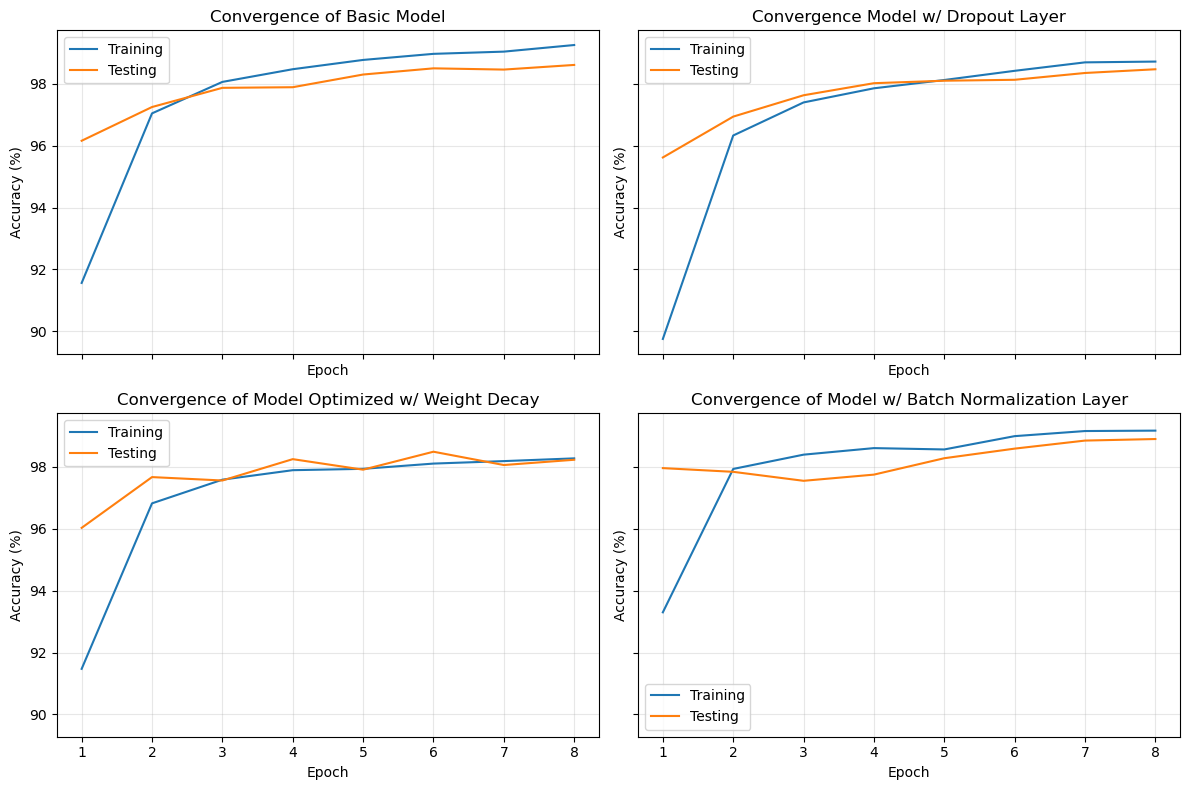

In [20]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

# --- Subplot 1: Modelo básico ---
axs[0, 0].plot(epochs, train_accuracy_base, label="Training")
axs[0, 0].plot(epochs, test_accuracy_base, label="Testing")
axs[0, 0].set_title("Convergence of Basic Model")
axs[0, 0].set_xlabel("Epoch")
axs[0, 0].set_ylabel("Accuracy (%)")
axs[0, 0].grid(True, alpha=0.3)
axs[0, 0].legend()

# --- Subplot 2: Modelo con Dropout ---
axs[0, 1].plot(epochs, train_accuracy_dropout, label="Training")
axs[0, 1].plot(epochs, test_accuracy_dropout, label="Testing")
axs[0, 1].set_title("Convergence Model w/ Dropout Layer")
axs[0, 1].set_xlabel("Epoch")
axs[0, 1].set_ylabel("Accuracy (%)")
axs[0, 1].grid(True, alpha=0.3)
axs[0, 1].legend()

# --- Subplot 3: Modelo con Weight Decay ---
axs[1, 0].plot(epochs, train_accuracy_decay, label="Training")
axs[1, 0].plot(epochs, test_accuracy_decay, label="Testing")
axs[1, 0].set_title("Convergence of Model Optimized w/ Weight Decay")
axs[1, 0].set_xlabel("Epoch")
axs[1, 0].set_ylabel("Accuracy (%)")
axs[1, 0].grid(True, alpha=0.3)
axs[1, 0].legend()

# --- Subplot 4: Modelo con BatchNorm ---
axs[1, 1].plot(epochs, train_accuracy_batch_norm, label="Training")
axs[1, 1].plot(epochs, test_accuracy_batch_norm, label="Testing")
axs[1, 1].set_title("Convergence of Model w/ Batch Normalization Layer")
axs[1, 1].set_xlabel("Epoch")
axs[1, 1].set_ylabel("Accuracy (%)")
axs[1, 1].grid(True, alpha=0.3)
axs[1, 1].legend()

plt.tight_layout()
plt.show()

In [21]:
import pandas as pd
model_names = ["Base", "Dropout", "Weight Decay", "Batch Normalization"]
final_train_accuracies = [train_accuracy_base[-1], train_accuracy_dropout[-1], train_accuracy_decay[-1], train_accuracy_batch_norm[-1]]
final_test_accuracies = [test_accuracy_base[-1], test_accuracy_dropout[-1], test_accuracy_decay[-1], test_accuracy_batch_norm[-1]]

pd.DataFrame({
    "Model": model_names,
    "Training Accuracy": final_train_accuracies,
    "Testing Accuracy": final_test_accuracies
})

,Model,Training Accuracy,Testing Accuracy
0,Base,99.253333,98.61
1,Dropout,98.718333,98.47
2,Weight Decay,98.275000,98.23
3,Batch Normalization,99.171667,98.90


Using batch_size = 128, 8 training epochs, and a learning_rate of 0.002, all models performed well on MNIST, reaching test accuracies above 98%.
The Base model achieved the highest training accuracy, but the model with Batch Normalization provided the best test accuracy (98.90%), indicating improved stability and reduced overfitting.

Meanwhile, the Dropout and Weight Decay variants showed slightly lower test performance, suggesting that the regularization introduced may have been somewhat too strong for this task, causing mild underfitting.

Overall, under these settings, Batch Normalization offered the best balance between learning and generalization on MNIST.

In [22]:
torch.save(model_base, "model_base.pt")
torch.save(model_dropout, "model_dropout.pt")
torch.save(model_decay, "model_decay.pt")
torch.save(model_batch_norm, "model_batch_norm.pt")